<a href="https://colab.research.google.com/github/esusrutha/zeroshot/blob/main/S_BERT_KG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install nltk networkx

In [3]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 56.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 123.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=ca653f8dacbc405f910a6d48cbe24d2d23d2247ef1fd6638c4a39bb0fb22bf83
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


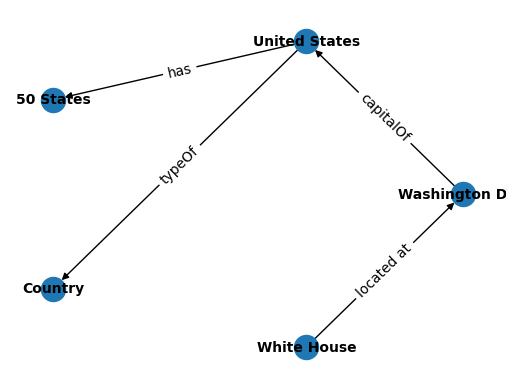

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import requests

# Define the nodes and relations
knowledge_graph = [
    ('Washington D.C.', 'capitalOf', 'United States'),
    ('United States', 'has', '50 States'),
    ('United States', 'typeOf', 'Country'),
    ('White House', 'located at', 'Washington D.C.')
]

# Create a NetworkX graph
graph = nx.DiGraph()  # Use DiGraph instead of Graph to indicate directed edges

# Iterate through the knowledge graph and retrieve additional information from ConceptNet API
for edge in knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]

    # Make a request to ConceptNet API to fetch additional information
    api_url = f'http://api.conceptnet.io/c/en/{source}?rel=/r/{relation}&end=/c/en/{target}'
    response = requests.get(api_url)
    if response.status_code == 200:
        data = response.json()

        # Extract the weight from the API response
        weight = 1.0  # Default weight if not found
        if 'edges' in data and len(data['edges']) > 0 and 'weight' in data['edges'][0]:
            weight = data['edges'][0]['weight']

        # Add directed edges to the graph
        graph.add_edge(source, target, relation=relation, weight=weight)

# Set node positions using a circular layout
pos = nx.circular_layout(graph)

# Draw nodes and edges with arrowheads
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos, arrows=True)  # Set arrows=True for directed edges

# Draw node labels
nx.draw_networkx_labels(graph, pos, font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(graph, 'relation')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)

# Display the graph
plt.axis('off')
plt.show()
Knowledge_graph = graph

In [5]:
sentences = []
for edge in Knowledge_graph:
    source = edge[0]
    relation = edge[1]
    target = edge[2]
    sentence = f"{source} {relation} {target}"
    sentences.append(sentence)
    print(sentences)

['W a s']
['W a s', 'U n i']
['W a s', 'U n i', '5 0  ']
['W a s', 'U n i', '5 0  ', 'C o u']
['W a s', 'U n i', '5 0  ', 'C o u', 'W h i']


In [6]:
!pip install nltk

In [7]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
from nltk.tokenize import word_tokenize
from collections import Counter

tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
word_counts = Counter([word for sentence in tokenized_sentences for word in sentence])
vocabulary = list(word_counts.keys())


In [10]:
import gensim.downloader as api

glove_model = api.load('glove-wiki-gigaword-300')


[==================================================] 100.0% 376.1/376.1MB downloaded


In [11]:
word_vectors = {word: glove_model[word] for word in vocabulary if word in glove_model}


In [12]:
knowledge_graph_embedding = []
for sentence in tokenized_sentences:
    sentence_vectors = [word_vectors[word] for word in sentence if word in word_vectors]
    if sentence_vectors:
        avg_vector = sum(sentence_vectors) / len(sentence_vectors)
        knowledge_graph_embedding.append(avg_vector)


In [13]:
for embedding in knowledge_graph_embedding:
    print(embedding)


[ 6.44499063e-03  7.04779997e-02 -2.04746008e-01 -3.02250028e-01
 -2.79864997e-01 -1.29079998e-01 -1.67080000e-01  2.46784002e-01
 -6.71100095e-02 -1.54159999e+00 -8.36150050e-02  2.43716493e-01
 -1.91754997e-01  3.93995009e-02  2.03174993e-01  1.21469989e-01
 -2.28782505e-01  1.19687997e-01  8.91035050e-02 -1.85551494e-01
 -1.91806510e-01  7.31249973e-02 -3.33999991e-02  2.77666003e-01
  2.62699872e-02 -1.45697504e-01  5.94327487e-02 -2.38749981e-02
  2.22784489e-01 -4.25550006e-02 -4.30215001e-01  5.12830019e-01
 -3.20445001e-01  1.12925008e-01 -7.92150021e-01  2.06495017e-01
 -2.87100077e-02 -6.27699941e-02 -2.32075006e-01  3.11802566e-01
  1.57115012e-01  2.48290002e-01 -3.07954997e-01  2.69558489e-01
 -1.36789992e-01 -1.86560005e-01  1.90310001e-01 -1.00961506e-01
 -2.76360005e-01 -8.73314515e-02 -2.46174991e-01  9.85570028e-02
  1.65069997e-02  1.41652495e-01  1.29753992e-01 -2.57650018e-02
 -1.27930000e-01 -1.71725005e-01  2.24216506e-01 -2.86704987e-01
 -2.47759998e-01  3.50775

In [14]:
from sentence_transformers import SentenceTransformer, models


In [15]:
model_name =SentenceTransformer('bert-base-nli-mean-tokens')


In [16]:
from sentence_transformers import SentenceTransformer

model_name = 'bert-base-nli-mean-tokens'
sbert_model = SentenceTransformer(model_name)

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
import nltk
from transformers import AutoTokenizer

# Load the pre-trained S-BERT model tokenizer
model_name = "sentence-transformers/bert-base-nli-mean-tokens"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Download the list of common English words from nltk
nltk.download("words")
common_words = set(nltk.corpus.words.words())

# Get the vocabulary words from the S-BERT model
vocab = tokenizer.get_vocab()
vocab_words = list(vocab.keys())

# Filter the vocabulary words to keep only the common English words
common_vocab_words = [word for word in vocab_words if word.lower() in common_words]

# Get the most common vocabulary words based on their frequencies
top_n = 50
common_vocab_freqs = [vocab[word] for word in common_vocab_words]
most_common_vocab = sorted(zip(common_vocab_words, common_vocab_freqs), key=lambda x: x[1], reverse=True)[:top_n]

# Store the most common vocabulary words in a list
stored_words = [word for word, _ in most_common_vocab]

# Print the stored vocabulary words
for word in stored_words:
    print(word)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


thyroid
nitrate
genealogical
dowry
collarbone
arsenic
pudding
disgrace
wreath
wince
inhuman
bobbed
papyrus
flourishing
penitentiary
inflated
boredom
abolitionist
squeak
enthusiast
infiltrate
upstate
rosewood
patrice
vet
foreigner
colossal
earthly
deprivation
taluka
stanza
embroidery
adventurer
unbroken
lough
adamant
polka
boardwalk
reindeer
attache
persist
enamel
effortlessly
yearning
loosen
ie
decorate
covent
strive
tread


In [19]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
vocabulary_embeddings=model.encode(stored_words)
print(vocabulary_embeddings)

[[ 0.48873162  0.06500884  0.47772452 ... -0.40955654  0.46699092
   0.07069273]
 [ 0.0471687   0.11385542  1.4651853  ...  0.26741958  0.7261962
   0.02695825]
 [-0.12113398  0.06735786  1.8669916  ... -0.46329498 -0.17647387
   0.27586937]
 ...
 [-0.29120237 -0.5358627   2.1869428  ... -0.28055066 -0.13021667
   0.34846485]
 [ 0.2502396  -0.34930214  2.894475   ... -0.4670917  -0.53532517
  -0.12669633]
 [ 0.56865364  0.12271676  2.1050196  ...  0.25418976 -0.10130865
   0.20984896]]


In [20]:
word_vectors = {word: glove_model[word] for word in stored_words if word in glove_model}

In [21]:
knowledge_graph_embedding = []
for word in stored_words:
    if word in word_vectors:
        word_vector = word_vectors[word]
        knowledge_graph_embedding.append(word_vector)

for embeddings in knowledge_graph_embedding:
    print(embeddings)


[-0.60309    0.43521    0.34076   -0.19945   -0.18648   -0.15395
 -0.3279    -0.18652   -0.10225   -0.27165   -0.81234    0.16711
 -0.65959   -0.093957  -0.65127    0.27834   -0.065087  -0.025754
 -0.46885    0.56334   -0.98922   -1.0424     0.15841   -0.53695
 -1.0966    -0.11377    0.12691   -0.28586   -0.38626    0.04408
  0.0095898  0.46223    0.40411   -0.35763    0.24802   -0.44011
 -0.049788   0.083146   0.23668    0.42204   -0.28741    0.45853
  0.42975   -1.1337    -0.010538  -0.064561  -0.30434    0.29693
 -0.51822    0.1545    -0.6576     0.19796    0.70584   -0.14076
 -0.30189   -0.38828   -0.26378    0.29245    0.50493    0.52774
 -0.15774   -0.13065    0.86067   -0.76376   -0.52396   -0.34766
 -0.76526    1.2282    -0.56637    0.40671    0.64794    0.2427
  0.37366    0.16699   -0.048311  -0.8844    -0.58703   -0.74998
  0.19419    0.25094   -0.28921    0.2612     0.85479    0.52452
 -0.29366    1.0324    -0.044289  -0.090738  -0.42323   -0.22433
 -0.50208   -0.052621  -0

In [22]:
import numpy as np

def learn_projection_matrix(embeddings, Y):
    # Center the S-BERT embeddings
    embeddings_centered = embeddings - np.mean(embeddings, axis=0)

    # Center the knowledge graph embeddings
    embedding_centered = embedding - np.mean(Y, axis=0)

    # Perform singular value decomposition on X
    U, S, VT = np.linalg.svd(embeddings_centered, full_matrices=False)

    # Construct the projection matrix
    P = VT.T @ U.T

    # Project the centered knowledge graph embeddings
    embedding_projected = embeddings_centered @ P

    return P, embedding_projected


# Assume X and Y are the S-BERT embeddings and knowledge graph embeddings respectively

# Generate random S-BERT embeddings and knowledge graph embeddings for demonstration
np.random.seed(42)
embeddings = np.random.rand(100, 50)
embedding = np.random.rand(100, 100)

# Learn the projection matrix
projection_matrix, projected_embeddings = learn_projection_matrix(embeddings, embedding)

# Print the projection matrix
print("Projection Matrix:")
print(projection_matrix)

# Print the projected knowledge graph embeddings
print("Projected Knowledge Graph Embeddings:")
print(projected_embeddings)


Projection Matrix:
[[-0.09530814  0.17247475 -0.09358466 ...  0.14192177 -0.1597433
  -0.03208431]
 [ 0.12331812  0.09035316  0.07318327 ... -0.00850685 -0.00285291
  -0.13983809]
 [ 0.06349116  0.14512936 -0.14235402 ...  0.08170926 -0.12210049
   0.02182195]
 ...
 [-0.00057901  0.09942775  0.02374778 ... -0.07940023  0.06602151
  -0.10459959]
 [-0.01308586 -0.15820529 -0.14251553 ... -0.1463997   0.06872969
   0.10336344]
 [-0.11006908 -0.08220933 -0.03814088 ...  0.16363046  0.1060267
  -0.01839051]]
Projected Knowledge Graph Embeddings:
[[ 1.29982025 -0.02232146 -0.10162462 ... -0.03898049 -0.36609878
  -0.02276538]
 [-0.02232146  1.55056445 -0.08702494 ... -0.05133531 -0.23956438
  -0.0634575 ]
 [-0.10162462 -0.08702494  1.49006846 ...  0.00516557  0.02108053
   0.14986073]
 ...
 [-0.03898049 -0.05133531  0.00516557 ...  1.37167816 -0.03615348
  -0.33672569]
 [-0.36609878 -0.23956438  0.02108053 ... -0.03615348  1.32426477
  -0.04661303]
 [-0.02276538 -0.0634575   0.14986073 ... -

In [23]:
!pip install scikit-learn

In [24]:
!pip install -U sentence-transformers

In [25]:
!pip install nltk

In [26]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
import re
import nltk
from nltk.tokenize import sent_tokenize
from sklearn.datasets import fetch_20newsgroups

# Fetch the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups()

# Get the list of categories
categories_list = newsgroups_data.target_names

# Preprocess and extract sentences from each category
for category in categories_list:
    # Initialize a list to store preprocessed sentences
    preprocessed_sentences = []

    # Get documents for the current category
    documents = fetch_20newsgroups(subset='all', categories=[category])

    for document in documents.data:
        # Remove question marks, special symbols, numbers, and URLs
        text = re.sub(r'\?', '', document)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'http\S+|www\S+', '', text)

        # Convert text to lowercase
        text = text.lower()

        # Tokenize the text into sentences
        sentences = sent_tokenize(text)

        # Preprocess and add sentences to the list
        for sentence in sentences:
            # Remove leading/trailing whitespaces
            sentence = sentence.strip()

            # Skip empty sentences
            if not sentence:
                continue

            preprocessed_sentences.append(sentence)

    # Print the preprocessed sentences
    for sentence in preprocessed_sentences:
        print(sentence)
    print("\n")


from acoopermacccmacalstredu turin turambar me department of utter misery
subject re societally acceptable behavior
organization macalester college
lines 

in article csasnewscsouiucedu cobbalexialisuiucedu mike cobb writes
 i guess im delving into a religious language area  what exactly is morality 
 or morals  

i hope there is not one with a subject like this you just have a spiral  what
would then be a morality of a morality of morals  labels dont make arguments 
one really needs a solid measuring stick by which most actions can be
interpreted even though this would hardly seem moral  for example the best
thing for me is to ensure that i will eat and drink enough  hence all actions
must be weighed against this one statement  whatever helps this goal is
moral whatever does not is immoral

of course this leads such a blank space there are so many different ways to
fulfill a goal one would need a hypermorality to apply to just the methods

i never thought of eating meat to be moral or

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.


   ncd has an excellent document titled host loading considerations in the x 
  environment i received my copy by emailing supportncdcom this may
  help out


tim white				 university of south carolina
timotishsscscarolinaedu	   humanities and social sciences laboratory
 		  		     columbia sc
from rootgrokcolumbiascncrcom ernie coskrey
subject re xterm fonts
nntppostinghost grokcolumbiascncrcom
organization ncr corporation  em columbia
lines 

in article maytayloruucp marktayloruucp mark a davis writes
 i have a problem which many of you might have run into  we use lots of
 ascii terminals and use them to the max  meaning lots of attributes line
 draw etc   now what i need to do is come up with a working xterm which
 will emulate our advanced ascii terminals as closely as possible
 
 this means needing all attributes to work including bold and line drawing
 the only fonts which seem to meet these criteria are a pairs of fonts in
 wh

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
is batting and an inning ends after the third out so it would seem that
making outs is bad while hitting home runs is good  players have tendencies
to hit or pitch at certain levels and these are usually somewhat consistent
from year to year

we do use these statistics to predict winners and so do you  to make
some flat predictions  barry bonds will have a higher obpslg than
gene larkin this year  the braves will finish ahead of the rockies
in the standings  the tigers will score more runs than the royals but
will also give up more  i would be astonished if any of these turned
out to be false and i suspect so would you  as a matter of fact i
am pretty sure i can predict all the division winners this year given
 guesses per division and this is certainly better than random
chance and almost statistically significant

if you will admit that the rockies and mariners are unlikely to meet in
the world series you must admit that there is som

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
 of time space and money as well as it makes it to tempting to lend
 out the backups 

weve destroyed about six sets of original microsoft word for mac  and  
word for windows may have been a bad batch of disks  dont have the  
faintest idea what happened to them they just went bad  werent stored  
near any magnetic fields or otherwise mistreated indeed they were only  
used once  given this and the massive headaches finding a working set of  
disks to fix some of the machines that periodically go down id say  
having working backups is a godsend  i sure wish wed had them sometimes  
i think murphys law holds true more often than newtons when we needed  
them  i think its sortof like snake antivenin   of the time you  
have absolutely no use for it but when you need it boy do you ever need  
it


dittos  in fact  at work where things are dead if the backup
is no good i insist on having at least a  level backup system  
it seems that wh

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



from patrwinguucp pat myrto
subject re fbi directors statement on waco standoff
distribution misclegaltxgeneraltxpoliticstalkpoliticsgunsaltlawenforcement
organization totally unorganized
lines 


in article cwcdintellectioncom emcguireintellectioncom ed mcguire writes
in apraiojscnasagov newsaiojscnasagov usenet news brenda kenworthy writes

and another thing that puzzles
mewhy are they finding dead bodies inside who had bullet holes already in 
them  dont you think its possible that koresh shot the traitors rather 
than letting them out

possible  i wouldnt put it past him  it is also possible that they
were hit by rounds exploding in the extreme heat  remember that kept
the cops away for hours  i have only heard that bodies were found
shot not any coroners cause of death

so far the medical examiner according to the news has found no evidence
of gunshot wounds in bodies so far examined  if this continues to be
the case it will sort of shoot holes pun intended in the fbi story
wouldn

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [28]:
print(newsgroups_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [29]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')
sentences_embeddings=model.encode(sentence)
print(sentences_embeddings)

[ 1.09039042e-02  1.33285344e+00  6.66448593e-01  1.34605169e-01
 -5.37374802e-03 -5.14817774e-01  1.49951863e+00 -3.78864318e-01
  2.08914466e-02 -1.36235446e-01 -5.53270757e-01  4.55447018e-01
  2.11144648e-02  4.65425074e-01 -1.01658356e+00  8.43070745e-01
 -2.37012088e-01 -3.39166552e-01 -3.07052851e-01  1.24860436e-01
 -2.88823426e-01 -6.65833294e-01  5.14435470e-01  4.39306498e-01
  1.37753367e+00  1.06918001e+00 -2.22981140e-01  5.54557517e-02
 -1.87858999e+00  5.81222057e-01 -1.29639640e-01 -1.96235389e-01
 -3.03638637e-01 -6.40682057e-02 -1.47274673e-01  6.71839654e-01
  6.75201535e-01 -4.76230562e-01  3.70623380e-01  1.99202418e-01
 -1.18417546e-01  3.49693567e-01 -2.60720879e-01 -2.06659772e-02
 -3.42278361e-01 -2.76800990e-02  1.12435508e+00  3.08227330e-01
  5.06314397e-01 -7.84928799e-01  6.58134460e-01  4.43810582e-01
  3.36649150e-01  1.12226531e-01  1.45687401e-01 -7.20396578e-01
  4.11479324e-02 -1.00916481e+00 -8.52265894e-01 -7.12945759e-01
 -1.47198391e+00  3.36915

In [30]:
import numpy as np

def project_embedding(sentences_embeddings, projection_matrix):
    # Subtract the mean from the embedding
    embedding_centered = sentences_embeddings - np.mean(embedding)

    # Project the embedding using the projection matrix
    projected_embeddings = embedding_centered @ projection_matrix

    return projected_embeddings

# Example usage
# Assume embedding is the S-BERT embedding you want to project

# Generate a random S-BERT embedding for demonstration
np.random.seed(42)
sentences_embeddings = np.random.rand(50)

# Project the embedding using the learned projection matrix
projected_embeddings = project_embedding(sentences_embeddings, projection_matrix)

# Print the projected embedding
print("Projected Embedding:")
print(projected_embeddings)


Projected Embedding:
[ 1.30687387 -0.04066706 -0.14628928  0.01860598 -0.09940461 -0.19209218
 -0.3207663   0.22204765  0.12335827  0.09156268 -0.02368809  0.08025284
  0.24590313  0.53629613 -0.05336272  0.10569727  0.083366   -0.01159127
 -0.22880577 -0.04092621  0.07965568  0.04537846 -0.02398593  0.07835251
 -0.13146179 -0.00461352  0.30216537 -0.06756688 -0.25300457 -0.12719156
 -0.18447022  0.0739523   0.2264946  -0.26333713 -0.10873587 -0.20317393
  0.06942004 -0.11394629  0.06835577 -0.22175881  0.16061691  0.24131903
 -0.07296041  0.15361611 -0.06762081 -0.01031447  0.07777875 -0.16042893
 -0.15836235 -0.12879169  0.15762891 -0.1136452  -0.04935963  0.02364582
  0.13731189  0.04068367  0.22599701 -0.11199133 -0.07053913 -0.11315466
 -0.35083914  0.00833267 -0.12750509 -0.22199958  0.12972984 -0.03064747
 -0.00564203 -0.20982909  0.018925    0.0257289  -0.13988713 -0.23355649
  0.01704343  0.00177938 -0.24888046  0.2867737  -0.02523299  0.03237498
 -0.08983364  0.10000682  0.32

In [31]:
from nltk.draw.table import Label
def categorize_classes(newsgroups_data):
    label = {
        "Computer": ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware"],
        "Religion": ["alt.atheism", "soc.religion.christian", "talk.religion.misc"],
        "Sports": ["rec.sport.baseball", "rec.sport.hockey"],
        "Politics": ["talk.politics.guns", "talk.politics.mideast", "talk.politics.misc"],
        "Vehicle": ["rec.autos", "rec.motorcycles"],
        "Science": ["sci.crypt", "sci.electronics", "sci.med", "sci.space"]
    }

    categorized_classes = {}

    for category, label_list in label.items():
        categorized_classes[category] = []
        for class_name in newsgroups_data:
            if class_name in label_list:
                categorized_classes[category].append(class_name)

    return categorized_classes

classes = ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware","alt.atheism", "soc.religion.christian", "talk.religion.misc","rec.sport.baseball", "rec.sport.hockey","talk.politics.guns", "talk.politics.mideast", "talk.politics.misc","rec.autos", "rec.motorcycles","sci.crypt", "sci.electronics", "sci.med", "sci.space"]

categorized_classes = categorize_classes(classes)

for category, label_list in categorized_classes.items():
    print(f" '{category}': {label_list}")



 'Computer': ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
 'Religion': ['alt.atheism', 'soc.religion.christian', 'talk.religion.misc']
 'Sports': ['rec.sport.baseball', 'rec.sport.hockey']
 'Politics': ['talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc']
 'Vehicle': ['rec.autos', 'rec.motorcycles']
 'Science': ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']


In [32]:
def categorize_classes(newsgroups_data):
    label = {
        "Computer": ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware"],
        "Religion": ["alt.atheism", "soc.religion.christian", "talk.religion.misc"],
        "Sports": ["rec.sport.baseball", "rec.sport.hockey"],
        "Politics": ["talk.politics.guns", "talk.politics.mideast", "talk.politics.misc"],
        "Vehicle": ["rec.autos", "rec.motorcycles"],
        "Science": ["sci.crypt", "sci.electronics", "sci.med", "sci.space"]
    }

    categorized_classes = {}

    for category, label_list in label.items():
        categorized_classes[category] = []
        for class_name in newsgroups_data:
            if class_name in label_list:
                categorized_classes[category].append(class_name)

    return categorized_classes

classes = ["comp.graphics", "comp.os.ms-windows.misc", "comp.sys.ibm.pc.hardware", "comp.sys.mac.hardware","alt.atheism", "soc.religion.christian", "talk.religion.misc","rec.sport.baseball", "rec.sport.hockey","talk.politics.guns", "talk.politics.mideast", "talk.politics.misc","rec.autos", "rec.motorcycles","sci.crypt", "sci.electronics", "sci.med", "sci.space"]

categorized_classes = categorize_classes(classes)

for category, label_list in categorized_classes.items():
    print(f" '{category}': {label_list}")


 'Computer': ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
 'Religion': ['alt.atheism', 'soc.religion.christian', 'talk.religion.misc']
 'Sports': ['rec.sport.baseball', 'rec.sport.hockey']
 'Politics': ['talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc']
 'Vehicle': ['rec.autos', 'rec.motorcycles']
 'Science': ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']


In [33]:
print(categorized_classes)

{'Computer': ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'], 'Religion': ['alt.atheism', 'soc.religion.christian', 'talk.religion.misc'], 'Sports': ['rec.sport.baseball', 'rec.sport.hockey'], 'Politics': ['talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc'], 'Vehicle': ['rec.autos', 'rec.motorcycles'], 'Science': ['sci.crypt', 'sci.electronics', 'sci.med', 'sci.space']}


In [34]:
from sentence_transformers import SentenceTransformer
import numpy as np

def encode_categories(categorized_classes):
    # Load the pre-trained S-BERT model
    model = SentenceTransformer('bert-base-nli-mean-tokens')

    encoded_categories = {}

    for category, label_list in categorized_classes.items():
        category_labels = label_list[:-1]  # Exclude the mean embedding from the labels
        category_mean_embedding = label_list[-1]

        # Encode the category labels using S-BERT
        label_embeddings = model.encode(category_labels)

        # Reshape the mean embedding to have the same dimensions as the label embeddings
        category_mean_embedding = np.tile(category_mean_embedding, (len(label_embeddings), 1))

        # Concatenate the label embeddings with the mean embedding
        category_embeddings = np.concatenate((label_embeddings, category_mean_embedding), axis=1)

        encoded_categories[category] = category_embeddings

    return encoded_categories

# Assuming you have already obtained the categorized_classes dictionary

encoded_categories = encode_categories(categorized_classes)

for category, embeddings in encoded_categories.items():
    print(f"Category: {category}")
    print(f"Embeddings: {embeddings}")
    print()


Category: Computer
Embeddings: [['-0.66692305' '-0.44592276' '1.7488912' ... '-0.16705705' '0.27120462'
  'comp.sys.mac.hardware']
 ['-0.6684437' '0.35439152' '0.74814713' ... '0.22040376' '0.66423285'
  'comp.sys.mac.hardware']
 ['-0.2871024' '0.25994986' '0.45993954' ... '-0.046130214' '0.27789363'
  'comp.sys.mac.hardware']]

Category: Religion
Embeddings: [['0.1149381' '0.15126884' '1.1715368' ... '0.3586207' '-0.06601106'
  'talk.religion.misc']
 ['0.3647675' '0.52443904' '0.51779735' ... '1.0325562' '-0.42694297'
  'talk.religion.misc']]

Category: Sports
Embeddings: [['0.2638898' '-0.95357406' '0.4403912' '0.525046' '-0.31192306'
  '-0.77384675' '-0.442646' '0.69328105' '-0.47587898' '-0.9093893'
  '-0.32604194' '0.9802648' '0.20987286' '-0.26105025' '0.27757224'
  '1.26254' '0.25698167' '0.20430301' '-0.042090904' '-0.6546779'
  '-1.5570916' '0.08638169' '-0.5382782' '-0.37845898' '-0.6423877'
  '-0.20155726' '-0.26605916' '-0.08140041' '-0.7743234' '-0.14855336'
  '0.04223224'

In [35]:
from sentence_transformers import SentenceTransformer
import numpy as np

def encode_categories(categorized_classes):
    model = SentenceTransformer('bert-base-nli-mean-tokens')

    encoded_categories = {}
    for category, label_list in categorized_classes.items():
        label_embeddings = model.encode(label_list)
        mean_embedding = np.mean(label_embeddings, axis=0)
        encoded_categories[category] = np.concatenate((label_embeddings, [mean_embedding]), axis=0)

    return encoded_categories

def project_embedding(encoded_categories, projection_matrix):
    projected_categories = {}
    for category, embeddings in encoded_categories.items():
        embeddings = embeddings.astype(float)
        embeddings_centered = embeddings - np.mean(embeddings, axis=0)
        projected_embeddings = embeddings_centered @ projection_matrix
        projected_categories[category] = projected_embeddings

    return projected_categories

# Assuming you have the categorized_classes dictionary and the projection_matrix

# Encode the categories using S-BERT
encoded_categories = encode_categories(categorized_classes)

# Example usage
# Generate a random projection matrix for demonstration
np.random.seed(42)
projection_matrix = np.random.rand(768, 100)

# Project the embeddings using the learned projection matrix
projected_categories = project_embedding(encoded_categories, projection_matrix)

# Print the projected embeddings for each category
for category, embeddings in projected_categories.items():
    print(f"Category: {category}")
    print(f"Projected Embeddings: {embeddings}")
    print()


Category: Computer
Projected Embeddings: [[ 1.81542221e+00  3.52571702e-01  7.09934206e-01 -1.10618301e+00
   1.31169670e+00 -1.48537014e-01 -3.83008001e-01 -3.39353586e+00
   1.03882919e+00  2.95751519e+00 -1.03214515e+00  2.33835422e+00
  -2.91267410e+00  2.81885517e+00  4.96142496e+00  1.36654300e+00
   3.34969754e+00  1.56719461e+00 -2.21767027e+00  1.01636370e+00
   3.34569979e-01 -1.69472720e+00  2.90525599e+00  1.00127498e+00
  -2.15697877e+00  1.87223880e+00  4.67339896e+00 -1.33574231e+00
   3.36851318e+00  3.51191996e+00 -1.15215838e+00  2.43205369e+00
  -2.69942820e+00 -1.31788688e+00 -4.87002994e-01 -3.30668853e+00
   2.05044239e+00 -3.15694164e+00 -1.14910741e+00 -4.53112288e-01
  -9.61325839e-01 -6.22036542e-01  5.47588104e+00 -5.34439491e-01
   4.10268853e+00 -2.66964146e+00 -2.57381018e+00  5.27996043e+00
  -1.84460941e+00  1.43089239e-01  5.57340135e+00 -1.27640738e+00
  -2.15539630e+00 -2.06735541e+00  1.47067335e+00  4.20799423e+00
  -7.10464641e-01  2.52368403e+00  

In [38]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_labels(sentence_embedding, projected_categories, categories_list):
    # Convert the projected_categories dictionary to a numerical array
    projected_embeddings = np.array(list(projected_categories.values()))

    # Calculate cosine similarity between the sentence embedding and projected embeddings
    similarities = cosine_similarity(sentence_embedding.reshape(1, -1), projected_embeddings)

    # Find the index of the most similar projected embedding
    most_similar_index = np.argmax(similarities)

    # Retrieve the corresponding label
    predicted_label = categories_list[most_similar_index]

    return predicted_label

# Example usage
np.random.seed(42)
projected_categories = {
    'Computer': np.random.rand(50),
    'Religion': np.random.rand(50),
    'Sports': np.random.rand(50),
    'Politics': np.random.rand(50),
    'Vehicle': np.random.rand(50),
    'Science': np.random.rand(50)
}
categories_list = list(projected_categories.keys())

sentence_embedding = np.random.rand(50)

# Predict the label for the sentence
predicted_label = predict_labels(sentence_embedding, projected_categories, categories_list)

# Print the predicted label
print("Predicted Label:", predicted_label)


Predicted Label: Science


In [39]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_labels(sentence_embedding, projected_categories, categories_list):
    # Convert the projected_categories dictionary to a numerical array
    projected_embeddings = np.array(list(projected_categories.values()))

    # Calculate cosine similarity between the sentence embedding and projected embeddings
    similarities = cosine_similarity(sentence_embedding.reshape(1, -1), projected_categories)

    # Find the index of the most similar projected embedding
    most_similar_index = np.argmax(similarities)

    # Retrieve the corresponding label
    predicted_label = categories_list[most_similar_index]

    return predicted_label

# Example usage
# Assume sentence_embedding is the projected embedding of a sentence
# Assume projected_categories is the dictionary of projected embeddings for each category
# Assume categories_list is the list of category labels corresponding to the projected_categories

# Generate random projected embeddings and labels for demonstration
np.random.seed(42)
projected_embeddings = np.random.rand(100, 50)
categories_list = ['Computer', 'Religion', 'Sports','Politics','Vehicle','Science']  # Replace ... with the remaining categories

# Generate a random sentence embedding for demonstration
sentence_embedding = np.random.rand(50)

# Predict the label for the sentence
predicted_label = predict_labels(sentence_embedding, projected_categories, categories_list)

# Print the predicted label
print("Predicted Label:", predicted_label)


TypeError: ignored

In [36]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def predict_labels(projected_embeddings, projected_categories, categories_list):
    # Calculate cosine similarity between the sentence embedding and projected embeddings
    similarities = cosine_similarity(projected_embeddings.reshape(1, -1), projected_categories)

    # Find the index of the most similar projected embedding
    most_similar_index = np.argmax(similarities)

    # Retrieve the corresponding label
    predicted_label = categories_list[most_similar_index]

    return predicted_label

# Example usage
# Assume sentence_embedding is the projected embedding of a sentence
# Assume projected_embeddings is the matrix of projected embeddings for all labels
# Assume labels is the list of labels corresponding to the projected_embeddings

# Generate random projected embeddings and labels for demonstration
np.random.seed(42)
projected_embeddings = np.random.rand(100, 50)
labels = ['label1', 'label2', 'label3', ...]  # Replace ... with the remaining labels

# Generate a random sentence embedding for demonstration
projected_embeddings = np.random.rand(50)

# Predict the label for the sentence
predicted_label = predict_labels(projected_embeddings, projected_categories, categories_list)

# Print the predicted label
print("Predicted Label:", predicted_label)


TypeError: ignored